In [6]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import re
from statsmodels.formula.api import ols

In [194]:
df = pd.read_csv('data.csv')

In [195]:
def strtolistc(val):
    """Convert string to list of floats"""
    ls = val.strip('[]').split(',')
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))
def strtolistn(val):
    """Convert string to list of floats"""
    ls = [x for x in re.split('\n | ', val.strip('[]')) if x]
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))

In [196]:
def separate(val):
    ls = []
    for i in range(per_team):
        ls.append(val[i*h_each:(i+1)*h_each])
    return(ls)

In [197]:
df['d_heuristics'] = df['d_heuristics'].apply(strtolistc)
df['x_heuristics'] = df['x_heuristics'].apply(strtolistc)
df['d_set'] = df['d_heuristics'].map(lambda x: set(x))
df['x_set'] = df['x_heuristics'].map(lambda x: set(x))
df['d_cover'] = df['d_set'].map(lambda x: len(x))
df['x_cover'] = df['x_set'].map(lambda x: len(x))
df['d_heuristics'] = df['d_heuristics'].apply(separate)
df['x_heuristics'] = df['x_heuristics'].apply(separate)
df['dta'] = df['diverse'] > df['expert']

11.221841951495149 6.45716175346899


<AxesSubplot:>

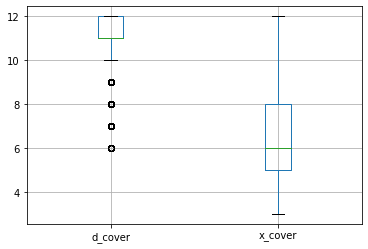

In [198]:
print(np.mean(df['d_cover']), np.mean(df['x_cover']))
df.boxplot(column=['d_cover', 'x_cover'])

In [214]:
dta = df[(df['sigma']==0)][['dta', 'trust', 'smoothness']].groupby(['trust', 'smoothness'])['dta'].sum().to_frame().unstack()
dta = dta['dta']
count = df[(df['sigma']==0)][['dta', 'trust', 'smoothness']].groupby(['trust', 'smoothness'])['dta'].count().to_frame().unstack()
count = count['dta']
dta = dta/count

In [215]:
count

smoothness,1,2,3,4,5,6,7,8
trust,,,,,,,,
0.00,1301,1301,1301,1301,1301,1301,1301,1301
0.33,1301,1301,1301,1301,1301,1301,1301,1301
0.50,1301,1301,1301,1301,1301,1301,1301,1301
1.00,1301,1301,1301,1301,1301,1301,1301,1301


([<matplotlib.axis.XTick at 0x14b74f6d0>,
 [Text(0, 0, 'none'),
  Text(1, 0, 'low'),
  Text(2, 0, 'moderate'),
  Text(3, 0, 'high')])

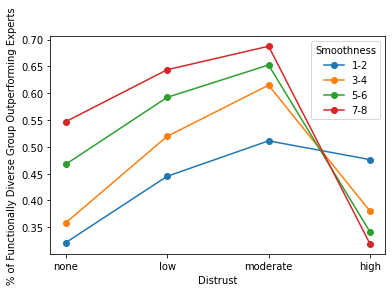

In [216]:
fig, ax = plt.subplots()
for i in range(1, 9, 2):
    data = list((dta[i]+dta[i+1])/2)
    data.reverse()
    ax.plot(data, label=str(i)+'-'+str(i+1), marker='o')
#     ax.set_ylim(0, 70)
plt.xlabel('Distrust')
plt.ylabel('% of Functionally Diverse Group Outperforming Experts')
plt.legend(title='Smoothness')
plt.xticks((0, 1, 2, 3), ['none', 'low', 'moderate', 'high'])

# plt.savefig('graphs/main.png', dpi=200, bbox_inches='tight')

In [126]:
df['dta'] = df['dta'].map(lambda x: int(x))

In [128]:
m = ols("dta ~ trust", data=df[(df['sigma']==12)]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dta   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6255
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.429
Time:                        15:48:13   Log-Likelihood:                -4653.1
No. Observations:               20473   AIC:                             9310.
Df Residuals:                   20471   BIC:                             9326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1049      0.003     30.631      0.000       0.098       0.112
trust         -0.0046      0.006     -0.791      0.429      -0.016       0.007
==============================================================================
Omnibus:                    10248.833   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43323.125
Skew:                           2.615   Prob(JB):                         0.00
Kurtosis:                       7.840   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""